# Linear models: logististic regression

CSI 4106 - Fall 2024

Marcel Turcotte  
Version: Sep 20, 2024 16:26

# Preamble

## Quote of Day

<https://youtu.be/hubWIuuz-e4>

[2024 Waymo Safety Impact Report](https://waymo.com/safety/impact) was
published on 2024-09-05. Waymo is a subsidiary of Alphabet inc.,
Google’s parent company. It operates robotaxi services in 4 US cities.

## Learning Objectives

-   **Differentiate** between binary classification and multi-class
    classification paradigms.
-   **Describe** the methodologies for converting multi-class
    classification problems into binary classification tasks.
-   **Articulate** the concept of decision boundaries and their
    significance in classification tasks.
-   **Implement** a logistic regression algorithm, focusing on its
    application in classification problems.

# Classification tasks

## Definitions

-   **Binary classification** is a supervised learning task where the
    objective is to categorize instances (examples) into one of **two
    discrete classes**.

-   A **multi-class classification** task is a type of supervised
    learning problem where the objective is to categorize instances into
    one of **three or more discrete classes**.
some algos are designed to only handle binary classification

## Binary classification

-   Some machine learning algorithms are specifically designed to solve
    binary classification problems.
    -   **Logistic regression** and **support vector machines** (SVMs)
        are such examples.

Later in the presentation, make sure to understand why the logistic
regression is specifically designed to solve binary classification
problems.

## Multi-class classification

-   Any **multi-class classification problem** can be transformed into a
    **binary classification problem**.
-   **One-vs-All (OvA)**
    -   A **separate binary classifier** is trained **for each class**.
    -   For each classifier, **one class** is treated as the **positive
        class**, and **all other classes** are treated as the **negative
        class**.
    -   The **final assignment** of a class label is made based on the
        classifier that outputs the **highest confidence score** for a
        given input.
          - many classifications give a confidence score

A complete example will be presented at the end of the lecture.

## Discussion

To introduce the concept of **decision boundaries**, let’s reexamine the
Iris dataset.

## Loading the Iris dataset

In [ ]:
from sklearn.datasets import load_iris

# Load the Iris dataset

iris = load_iris()

import pandas as pd

# Create a DataFrame

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

## Pairwise Scatter Plots of Iris Features

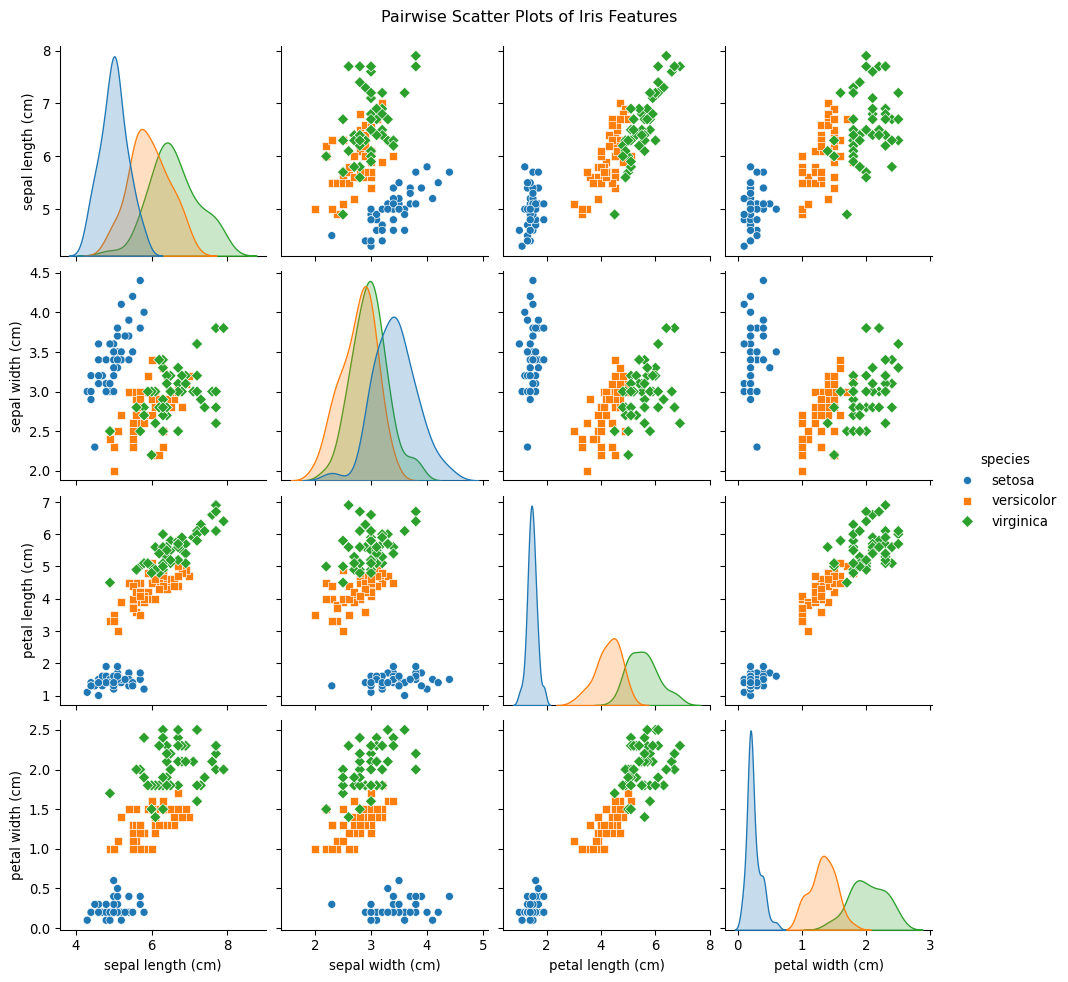

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Using string labels to ease visualization

df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Display all pairwise scatter plots

sns.pairplot(df, hue='species', markers=["o", "s", "D"])
plt.suptitle("Pairwise Scatter Plots of Iris Features", y=1.02)
plt.show()

Upon examining the scatter plots, it is evident that distinguishing
**Setosa** from the **other two varieties** (Versicolor and Virginica)
is relatively straightforward. In contrast, separating Versicolor from
Virginica presents a greater challenge, as their distributions overlap
in all the univariate plots displayed on the diagonal.

Here, we define a One-vs-All classification problem to determine whether
an example is Setosa or not. It is important to note that this approach
will result in an imbalanced dataset, consisting of 50 instances of
Setosa and 100 instances of Not Setosa.

## One-vs-All (OvA) on the Iris dataset

In [ ]:
import numpy as np

# Transform the target variable into binary classification
# 'setosa' (class 0) vs. 'not setosa' (classes 1 and 2)

y_binary = np.where(iris.target == 0, 0, 1)

# Create a DataFrame for easier plotting with Seaborn

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['is_setosa'] = y_binary

print(y_binary)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]

## One-vs-All (OvA) on the Iris dataset

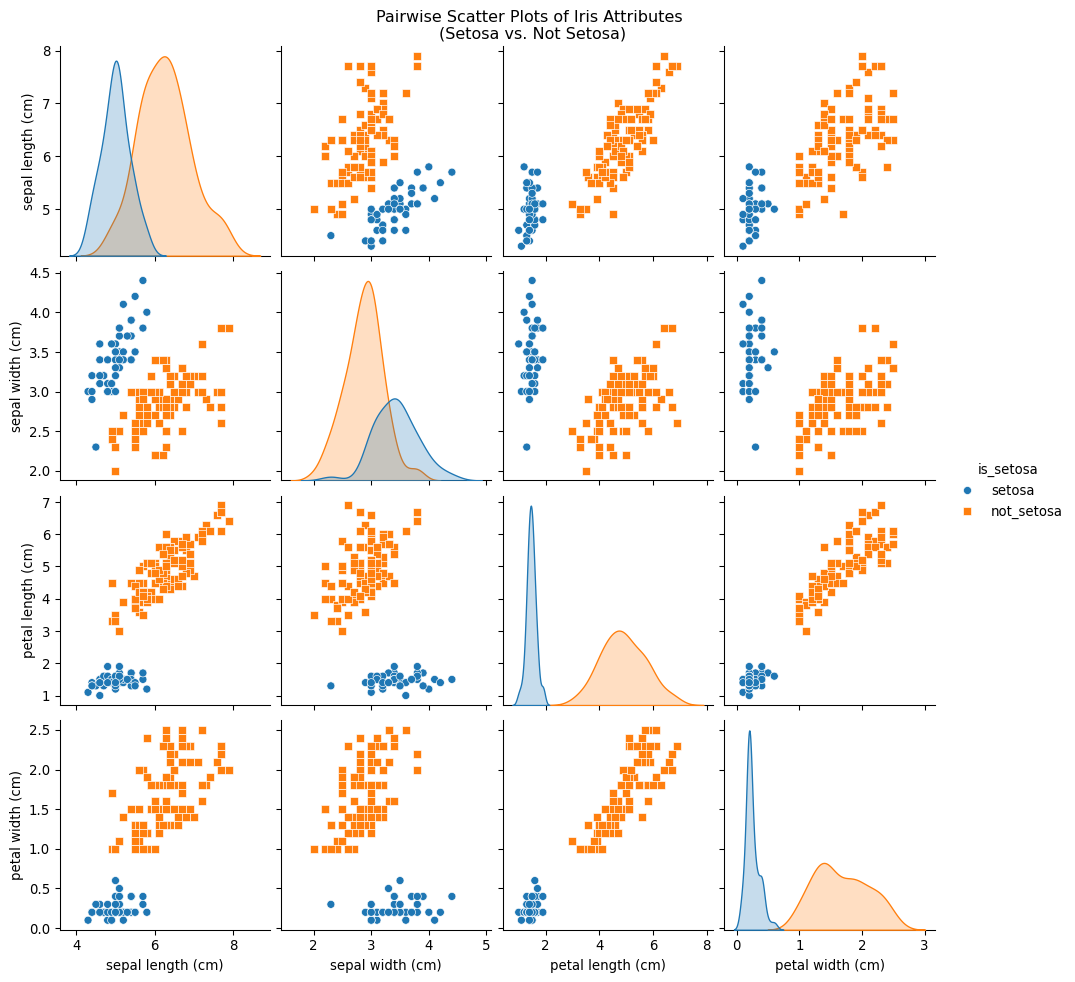

In [ ]:
# Using string labels for visualization

df['is_setosa'] = df['is_setosa'].map({0: 'setosa', 1: 'not_setosa'})

# Pairwise scatter plots

sns.pairplot(df, hue='is_setosa', markers=["o", "s"])
plt.suptitle('Pairwise Scatter Plots of Iris Attributes \n(Setosa vs. Not Setosa)', y=1.02)
plt.show()

## Setosa vs not setosa

-   Clearly, we have **simplified the problem**.
-   In the majority of the scatter plots, the **setosa** examples are
    **clustered together**.

# Decision boundaries

## Definition

A **decision boundary** is a boundary that partitions the underlying
feature space into **regions** corresponding to **different class
labels**.

The term **boundary** will be clarified over the next slides.

## Decision boundary

Consider **two attributes**, say *petal length* and *sepal width*, the
decision boundary can be **line**.

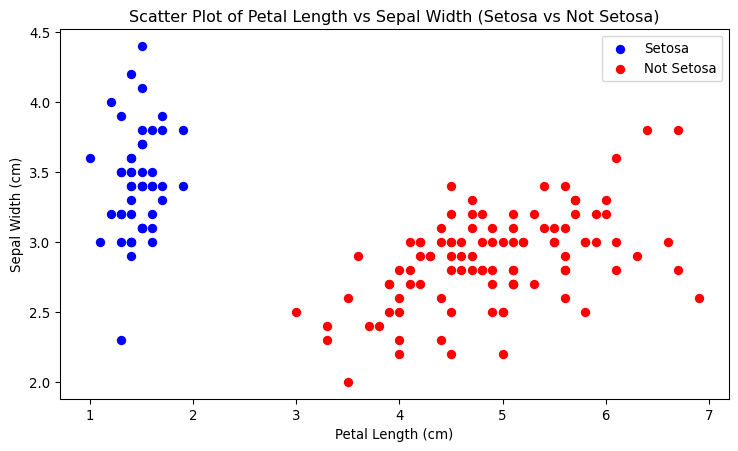

## Decision boundary

Consider **two attributes**, say *petal length* and *sepal width*, the
decision boundary can be **line**.

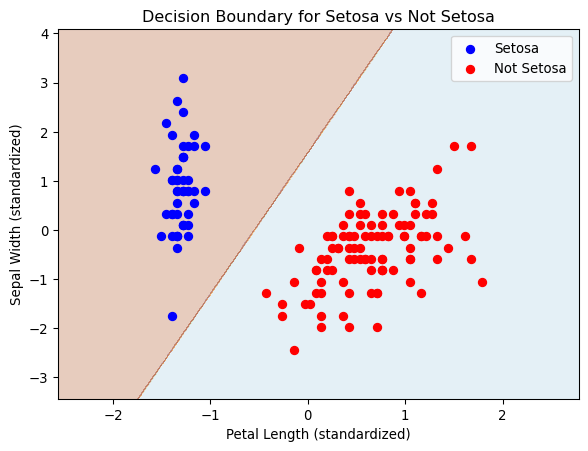

## Definition

We say that the data is **linearly separable** when two classes of data
can be perfectly separated by a **single linear boundary**, such as a
**line** in **two-dimensional space** or a **hyperplane in higher
dimensions**.
- some algos only work with data that is linearly separable

## Simple decision boundary

![](attachment:../../assets//images/geurts-2009fq_fig1.png)

*(a)* training data, *(b)* quadratic curve, and *(c)* linear function.

**Attribution:** Geurts, P., Irrthum, A. & Wehenkel, L. Supervised
learning with decision tree-based methods in computational and systems
biology. *Mol Biosyst* **5** 1593–1605 (2009).

The table on the left presents training data for a hypothetical **binary
classification task** in a medical context, where the two attributes,
$X_1$ and $X_2$, are used to predict the target variable, $y$, which can
take on two values: *sick* and *healthy*. You can imagine that $X_1$ and
$X_2$ are measurements, such as blood pressure and heart rate or
cholesterol and glucose levels.

**Logistic regression** (c) employs a linear **decision boundary**. In
this specific example, the decision boundary is represented by a
straight line. Employing logistic regression for this problem results in
several classification errors: red dots above the line, which should be
classified as ‘sick’, are incorrectly predicted as ‘healthy’.
Conversely, green dots below the line, which should be classified as
‘healthy’, are incorrectly predicted as ‘sick’.

## Complex decision boundary

![](attachment:../../assets//images/geurts-2009fq_fig2.png)

**Decision trees** are capable of generating **irregular** and
**non-linear** decision boundaries.

**Attribution:** *ibidem*.

Make sure to understand the relationships between the eight decision
rules delineated in the decision tree and the nine line segments
represented in the scatter plot.

## Decision boundary

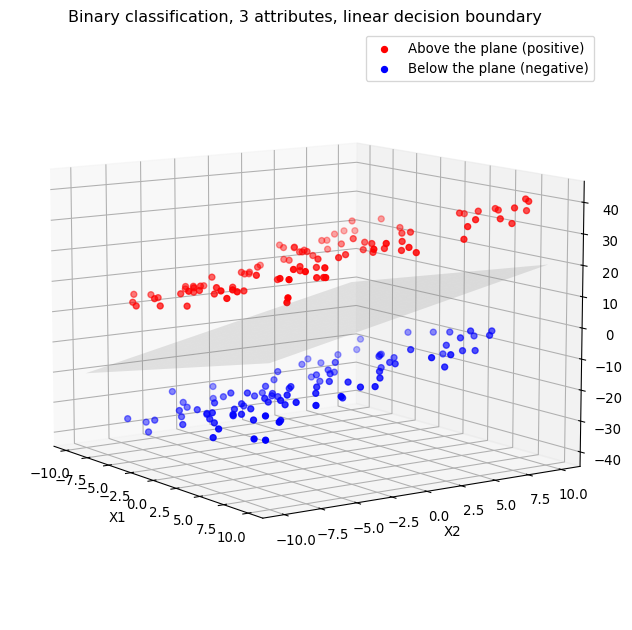

## Digression

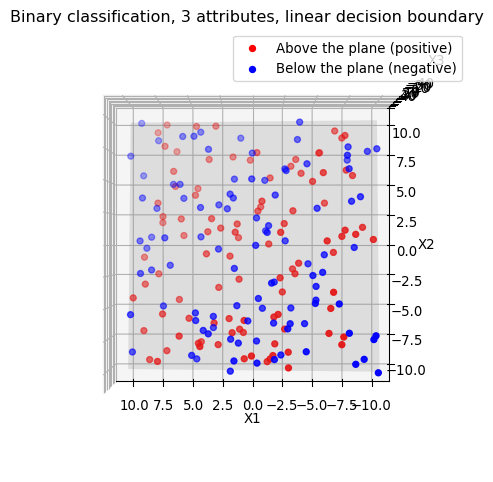

Observe that separating the data using only the two attributes, $x1$ and
$x2$, is infeasible. However, by incorporating a third attribute, $x3$,
the data becomes linearly separable, as can be seen on the previous
screen.

## Decision boundary

-   **2 attributes**, the *linear decision boundary* would be a
    **line**.
-   **2 attributes**, the *non-linear decision boundary* would be a
    **non-linear curve**.
-   **3 attributes**, the *linear decision boundary* would be a
    **plane**.
-   **3 attributes**, the *non-linear decision boundary* would be a
    **non-linear surface**.
-   **$\gt$ 3 attributes**, the *linear decision boundary* would be a
    **hyperplane**.
-   **$\gt$ 3 attributes**, the *non-linear decision boundary* would be
    a **hypersurface**.

In machine learning, it is common for problems to involve hundreds or
even thousands of attributes, rendering direct visualization infeasible.

Specifically, a *non-linear decision boundary* in high-dimensional space
is often conceptualized as a non-linear manifold.

## Definition (revised)

A **decision boundary** is a hypersurface that partitions the underlying
feature space into **regions** corresponding to **different class
labels**.

# Logistic regression

## Logistic (Logit) Regression

-   Despite its name, **logistic regression** serves as a
    **classification** algorithm rather than a regression technique.

-   The **labels** in logistic regression are binary values, denoted as
    $y_i \in \{0,1\}$, making it a **binary classification task**.

-   The primary objective of logistic regression is to determine the
    **probability** that a given instance $x_i$ belongs to the
    **positive class**, i.e., $y_i = 1$.

The representation of the two classes, **negative** and **positive**, by
the values 0 and 1, respectively, is not arbitrary. This choice is
intrinsically connected to our objective of determining the
**probability** that an instance $x_i$ belongs to the positive class.

While this learning algorithm may initially seem unremarkable, it is
essential to continue engaging with it, as logistic regression will
later prove to be crucial in the discussion on artificial neural
networks.

## Logistic regression

Consider **two attributes**, say *petal length* and *sepal width*.

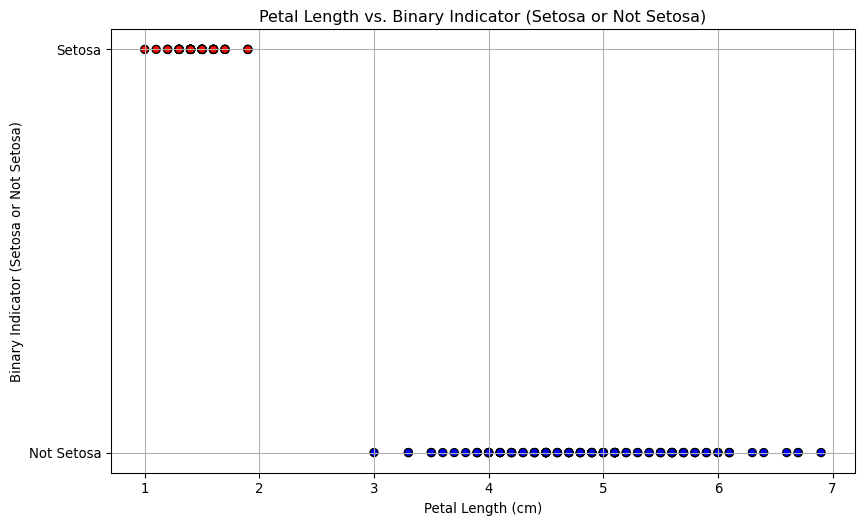

## Fitting a linear regression

### $\ldots$ is not the answer

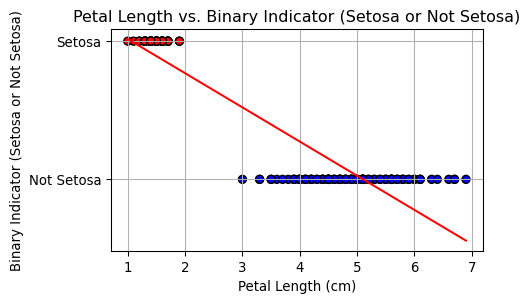

**The resulting line extends infinitely in both directions**, but our
goal is to constrain values between 0 and 1. Here, 1 indicates a **high
probability** that $x_i$ belongs to the positive class, while a value
near 0 indicates a **low probability**.

## Logistic function

In mathematics, the **standard logistic function** maps a real-valued
input from $\mathbb{R}$ to the open interval $(0,1)$. The function is
defined as:

$$
  \sigma(t) = \frac{1}{1+e^{-t}}
$$
- equation is not so important, the behaviour is what is important
- maps infinite range to (0, 1)

![](https://upload.wikimedia.org/wikipedia/commons/8/88/Logistic-curve.svg)

**Attribution:**
[Wikipedia](https://en.wikipedia.org/wiki/Logistic_function)

-   When the input variable $t$ is 0, the output of the logistic
    function is 0.5.
-   As $t$ increases, the output value approaches 1.
-   Conversely, as $t$ becomes more negative, the output value
    approaches 0.
-   The standard logistic function is also commonly referred to as the
    **sigmoid** function.

## Logistic regression (intuition)

![](attachment:slides_files/figure-ipynb/cell-12-output-1.png)

![](https://upload.wikimedia.org/wikipedia/commons/8/88/Logistic-curve.svg)

-   When the **distance to the decision boundary** is **zero**,
    uncertainty is high, making a probability of **0.5** appropriate.
-   As we move **away from the decision boundary**, confidence
    increases, warranting **higher** or **lower** probabilities
    accordingly.

## Logistic function

An S-shaped curve, such as the standard logistic function (aka
**sigmoid**), is termed a **squashing function** because it maps a wide
input domain to a constrained output range.

$$
  \sigma(t) = \frac{1}{1+e^{-t}}
$$

![](https://upload.wikimedia.org/wikipedia/commons/8/88/Logistic-curve.svg)

**Attribution:**
[Wikipedia](https://en.wikipedia.org/wiki/Logistic_function)

## Logistic (Logit) Regression

-   Analogous to **linear regression**, **logistic regression** computes
    a weighted sum of the input features, expressed as: $$
    \theta_0 + \theta_1 x_i^{(1)} + \theta_2 x_i^{(2)} + \ldots + \theta_D x_i^{(D)}
    $$

-   However, using the sigmoid function limits its output to the range
    $(0,1)$: $$
    \sigma(\theta_0 + \theta_1 x_i^{(1)} + \theta_2 x_i^{(2)} + \ldots + \theta_D x_i^{(D)})
    $$

## Logistic regression

The **Logistic Regression** model, in its vectorized form, is defined
as:

$$
  h_\theta(x_i) = \sigma(\theta x_i) = \frac{1}{1+e^{- \theta x_i}}
  $$

## Logistic regression (two attributes)

![](attachment:slides_files/figure-ipynb/cell-13-output-1.png)

$$
  h_\theta(x_i) = \sigma(\theta x_i)
$$

-   In logistic regression, **the probability of correctly classifying
    an example increases as its distance from the decision boundary
    increases**.
-   This principle holds for both **positive** and **negative** classes.
-   An example lying on the decision boundary has a **50% probability**
    of belonging to either class.

## Logistic regression

-   The **Logistic Regression** model, in its vectorized form, is
    defined as:

    $$
    h_\theta(x_i) = \sigma(\theta x_i) = \frac{1}{1+e^{- \theta x_i}}
    $$

-   **Predictions** are made as follows:

    -   $y_i = 0$, if $h_\theta(x_i) < 0.5$
    -   $y_i = 1$, if $h_\theta(x_i) \geq 0.5$

. . .

-   The values of $\theta$ are learned using **gradient descent**.

------------------------------------------------------------------------

<https://youtu.be/yIYKR4sgzI8>

**Attribution**: [StatQuest: Logistic
Regression](https://youtu.be/yIYKR4sgzI8) by Josh Starmer.

“StatQuest breaks down complicated Statistics and Machine Learning
methods into small, bite-sized pieces that are easy to understand.
StatQuest doesn’t dumb down the material, instead, it builds you up so
that you are smarter and have a better understanding of Statistics and
Machine Learning.” It is often a good place to start to get the
intuition to understand statistical and machine learning concepts.

# One-vs-All

## One-vs-All classifier (complete)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Binarize the output
y_bin = label_binarize(y, classes=[0, 1, 2])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)

## One-vs-All classifier (complete)

In [ ]:
# Train a One-vs-All classifier for each class

classifiers = []
for i in range(3):
    clf = LogisticRegression()
    clf.fit(X_train, y_train[:, i])
    classifiers.append(clf)

Each logistic regression finds a **hyperplane** in a **4-dimensional
space** that separates the data into two classes.

## One-vs-All classifier (complete)

In [ ]:
# Predict on a new sample
new_sample = X_test[0].reshape(1, -1)
confidences = [clf.decision_function(new_sample) for clf in classifiers]

# Final assignment
final_class = np.argmax(confidences)

# Printing the result
print(f"Final class assigned: {iris.target_names[final_class]}")
print(f"True class: {iris.target_names[np.argmax(y_test[0])]}")

Final class assigned: versicolor
True class: versicolor

## `label_binarized`

has a 1 in the col that represents the class

In [ ]:
from sklearn.preprocessing import label_binarize

# Original class labels
y_train = np.array([0, 1, 2, 0, 1, 2, 1, 0])

# Binarize the labels
y_train_binarized = label_binarize(y_train, classes=[0, 1, 2])

# Assume y_train_binarized contains the binarized labels
print("Binarized labels:\n", y_train_binarized)

# Convert binarized labels back to the original numerical values
original_labels = [np.argmax(b) for b in y_train_binarized]
print("Original labels:\n", original_labels)

Binarized labels:
 [[1 0 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]]
Original labels:
 [0, 1, 2, 0, 1, 2, 1, 0]

# Digits example

## UCI ML hand-written digits datasets

Loading the dataset

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()

What is the type of `digits.data`

In [ ]:
type(digits.data)

numpy.ndarray

Developing a **logistic regression model** for the **recognition of
handwritten digits**.

## UCI ML hand-written digits datasets

How many examples (`N`) and how many attributes (`D`)?

1797 examples, 64 attributes

In [ ]:
digits.data.shape

(1797, 64)

Assigning `N` and `D`

In [ ]:
N, D = digits.data.shape

`target` has the same number of entries (examples) as `data`?

In [ ]:
digits.target.shape

(1797,)

## UCI ML hand-written digits datasets

What are the width and height of those images?

In [ ]:
digits.images.shape

(1797, 8, 8)

Assigning `width` and `height`

In [ ]:
_, width, height = digits.images.shape

## UCI ML hand-written digits datasets

Assigning `X` and `y`

In [ ]:
X = digits.data
y = digits.target

## UCI ML hand-written digits datasets

Plot the first `n=5` examples

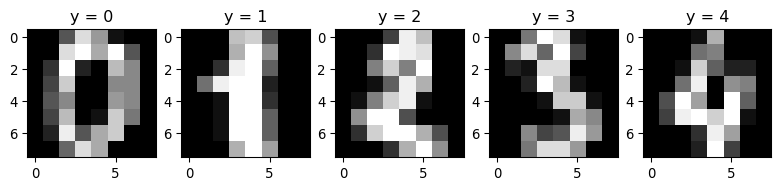

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,2))
n = 5

for index, (image, label) in enumerate(zip(X[0:n], y[0:n])):
    plt.subplot(1, n, index + 1)
    plt.imshow(np.reshape(image, (width,width)), cmap=plt.cm.gray)
    plt.title(f'y = {label}')

## UCI ML hand-written digits datasets

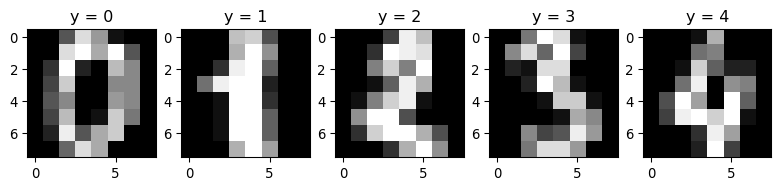

-   In our dataset, each $x_i$ is an **attribute vector** of size
    $D = 64$.

-   This vector is formed by concatenating the rows of an $8 \times 8$
    image.

-   The `reshape` function is employed to convert this 64-dimensional
    vector back into its original $8 \times 8$ image format.

## UCI ML hand-written digits datasets

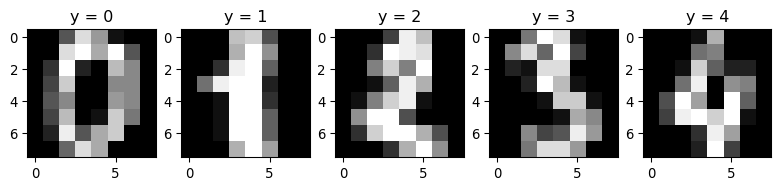

-   We will train **10 classifiers**, each corresponding to a specific
    digit in a **One-vs-All (OvA)** approach.

-   Each classifier will determine the optimal values of $\theta_j$
    (associated with the pixel features), allowing it to distinguish one
    digit from all other digits.

## UCI ML hand-written digits datasets

Preparing for our machine learning experiment

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

## UCI ML hand-written digits datasets

Optimization algorithms generally work best when the attributes have
similar ranges.

- StandardScaler normalizes the data
  - should not use test data to normalize that data! cheating. Will fail on new values
  - never touch the test set!
- !important! transform only gets its information from the training data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Discussion**: importance of applying `fit_transform` only to `X_train`

## UCI ML hand-written digits datasets

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(multi_class='ovr')
clf = clf.fit(X_train, y_train)

/Users/turcotte/opt/micromamba/envs/ai/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(

Asking the classifier to solve a multiclass task, using **one-vs-rest
(OvR)**, aka OvA. Classfiers in `sklearn` have [multi-learning
support](https://scikit-learn.org/stable/modules/multiclass.html)
built-in.

Each logistic regression finds a **hyperplane** in a **64-dimensional
space** that separates the data into two classes.

## UCI ML hand-written digits datasets

Applying the classifier to our test set

In [ ]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.95      0.95      0.95        22
           2       1.00      1.00      1.00        13
           3       0.95      1.00      0.97        18
           4       1.00      1.00      1.00        16
           5       1.00      1.00      1.00        16
           6       1.00      0.95      0.98        21
           7       1.00      0.94      0.97        17
           8       1.00      1.00      1.00        14
           9       0.95      1.00      0.98        21

    accuracy                           0.98       180
   macro avg       0.99      0.98      0.98       180
weighted avg       0.98      0.98      0.98       180


------------------------------------------------------------------------

<https://youtu.be/AX-ZEC-71DI>

**Attribution**: [Machine Learning and Logistic
Regression](https://youtu.be/AX-ZEC-71DI), IBM Technology, 2024-07-19.

# Prologue

## References

Russell, Stuart, and Peter Norvig. 2020. *Artificial Intelligence: A
Modern Approach*. 4th ed. Pearson. <http://aima.cs.berkeley.edu/>.

## Next lecture

-   Cross evaluation and performance measures

------------------------------------------------------------------------

Marcel **Turcotte**

<Marcel.Turcotte@uOttawa.ca>

School of Electrical Engineering and **Computer Science** (EE**CS**)

University of Ottawa